In [1]:
import ROOT as r

Welcome to JupyROOT 6.14/09


In [2]:
inputfile = r.TFile("data/Hgg_Background_data.root","READ")
inputfile.ls()

TFile**		data/Hgg_Background_data.root	
 TFile*		data/Hgg_Background_data.root	
  KEY: RooWorkspace	wnew;1	workspace
  KEY: TProcessID	ProcessID0;1	c4114b10-db48-11ea-8a94-aa94d380beef


In [3]:
w = inputfile.Get("wnew")

In [4]:
w.Print()


RooWorkspace(wnew) workspace contents

variables
---------
(CMS_hgg_mass)

datasets
--------
RooDataHist::roohist_data_mass_UntaggedTag_0(CMS_hgg_mass)



In [5]:
higgs_mass = w.var("CMS_hgg_mass")
mgg_low,mgg_high = 100,180
higgs_mass.setRange("unblindReg_1",mgg_low,115)
higgs_mass.setRange("unblindReg_2",135,mgg_high)
data_hist = w.data("roohist_data_mass_UntaggedTag_0")

In [6]:
frame = higgs_mass.frame(r.RooFit.Title("Higgs background"))
#data_hist.plotOn(frame)
data_hist.plotOn(frame,r.RooFit.Binning(mgg_high-mgg_low),r.RooFit.CutRange("unblindReg_1"))
data_hist.plotOn(frame,r.RooFit.Binning(mgg_high-mgg_low),r.RooFit.CutRange("unblindReg_2"))
#data_hist.plotOn(frame,r.RooFit.Binning(mgg_high-mgg_low),r.RooFit.Invisible())
frame.SetMinimum(0.0001)

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 722 events out of 1538 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 325 events out of 1538 total events


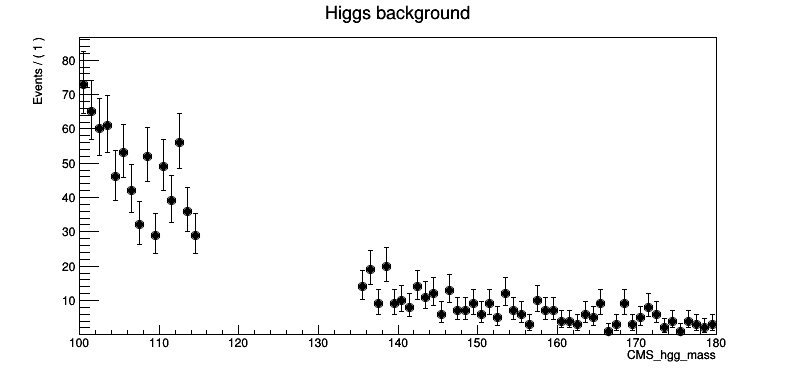

In [7]:
c = r.TCanvas("Exercise0x","Exercise0x",800,400)
frame.Draw()
c.Draw()